In [1]:
!pip install fredapi > /dev/null

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

In [3]:
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
pd.options.display.precision = 2

In [4]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color']

In [5]:
color_pal

['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

In [6]:
fred_key = '21cea194b7231e4548735f8b6f04ab4d'

In [7]:
fred = Fred(api_key = fred_key)

In [11]:
snp_search = fred.search('S&P')

In [12]:
snp_search.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2022-12-12,2022-12-12,S&P 500,2012-12-10,2022-12-09,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-12-09 19:10:50-06:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2022-12-12,2022-12-12,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2022-12-09,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-12-12 08:36:08-06:00,54,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2022-12-12,2022-12-12,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,33,This series is no longer being updated by the ...


In [13]:
snp_search.shape

(1000, 15)

In [14]:
fred.search('S&P', limit = 5, order_by = 'popularity')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-12-12,2022-12-12,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-12-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-12-12 09:46:09-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-12-12,2022-12-12,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-11-29 15:56:01-06:00,90,"For more information regarding the index, plea..."
SP500,SP500,2022-12-12,2022-12-12,S&P 500,2012-12-10,2022-12-09,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-12-09 19:10:50-06:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-12-12,2022-12-12,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-12-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-12-12 09:46:13-06:00,84,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2022-12-12,2022-12-12,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-11-29 15:56:03-06:00,81,"For more information regarding the index, plea..."


In [15]:
fred.get_series('SP500')

2012-12-10    1418.55
2012-12-11    1427.84
2012-12-12    1428.48
2012-12-13    1419.45
2012-12-14    1413.58
               ...   
2022-12-05    3998.84
2022-12-06    3941.26
2022-12-07    3933.92
2022-12-08    3963.51
2022-12-09    3934.38
Length: 2610, dtype: float64

In [16]:
sp500 = fred.get_series('SP500')

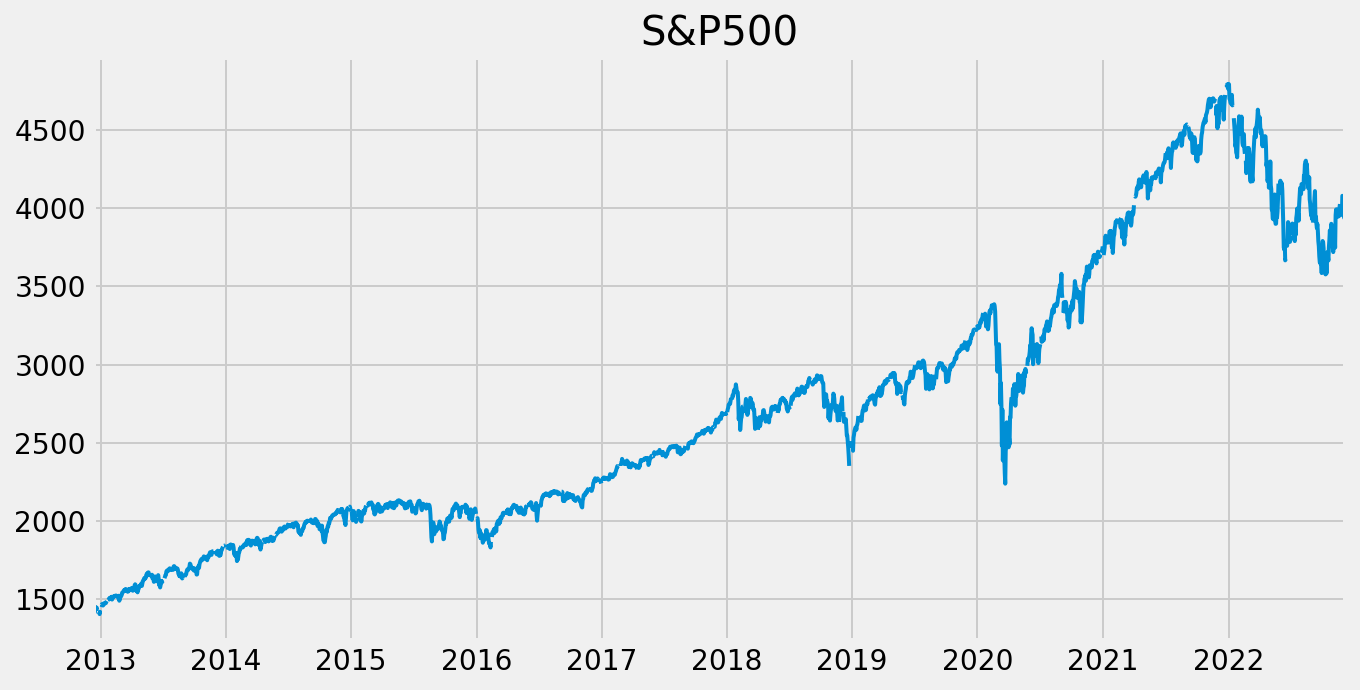

In [19]:
sp500.plot(kind = 'line', figsize = (10,5), title = 'S&P500', lw = 2);

In [20]:
fred.search('unemployment', limit = 25)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-12-12,2022-12-12,Unemployment Rate,1948-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-12-12,2022-12-12,Unemployment Rate,1948-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-02 07:43:03-06:00,57,The unemployment rate represents the number of...
NROU,NROU,2022-12-12,2022-12-12,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,70,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-12-12,2022-12-12,Unemployment Level,1948-01-01,2022-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-12-02 07:44:06-06:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2022-12-12,2022-12-12,Continued Claims (Insured Unemployment),1967-01-07,2022-11-26,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-12-08 07:33:03-06:00,72,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2022-12-12,2022-12-12,Continued Claims (Insured Unemployment),1967-01-07,2022-11-26,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2022-12-08 07:33:03-06:00,30,"Continued claims, also referred to as insured ..."
LNU03000000,LNU03000000,2022-12-12,2022-12-12,Unemployment Level,1948-01-01,2022-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2022-12-02 07:43:12-06:00,23,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2022-12-12,2022-12-12,Unemployment Rate - Black or African American,1972-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:09-06:00,66,The series comes from the 'Current Population ...
U6RATE,U6RATE,2022-12-12,2022-12-12,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:14-06:00,64,The series comes from the 'Current Population ...


In [21]:
unrate = fred.get_series('UNRATE')

In [22]:
unrate.head(5)

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

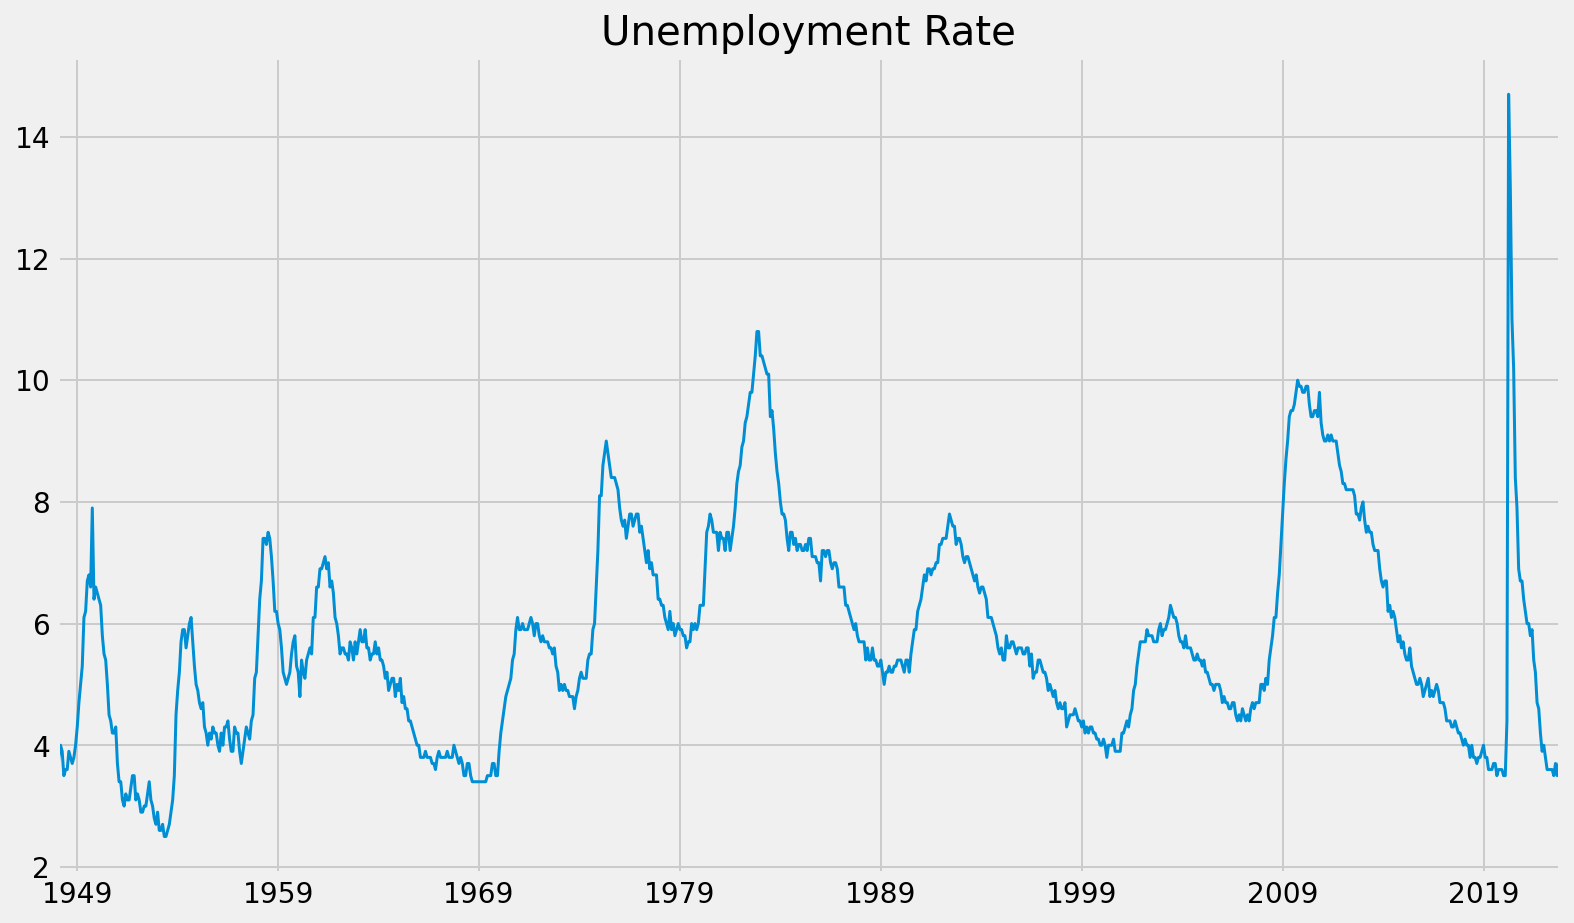

In [25]:
unrate.plot(kind = 'line', lw = 1.5, title = 'Unemployment Rate');

In [35]:
unemp_search = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))

In [36]:
unemp_search.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-12-12,2022-12-12,Unemployment Rate,1948-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-12-12,2022-12-12,Unemployment Rate,1948-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-12-02 07:43:03-06:00,57,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2022-12-12,2022-12-12,Unemployment Level,1948-01-01,2022-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-12-02 07:44:06-06:00,69,The series comes from the 'Current Population ...


In [37]:
unemp_search.query('seasonal_adjustment == "Seasonally Adjusted" & units == "Percent"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-12-12,2022-12-12,Unemployment Rate,1948-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:02-06:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-12-12,2022-12-12,Unemployment Rate - Black or African American,1972-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:09-06:00,66,The series comes from the 'Current Population ...
U6RATE,U6RATE,2022-12-12,2022-12-12,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:14-06:00,64,The series comes from the 'Current Population ...
CAUR,CAUR,2022-12-12,2022-12-12,Unemployment Rate in California,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:17:13-06:00,58,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2022-12-12,2022-12-12,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBSSA46,LBSSA46,2022-12-12,2022-12-12,Labor Force Participation Rate for South Dakota,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 09:01:12-06:00,5,A state's labor-force participation rate is th...
LNS14000150,LNS14000150,2022-12-12,2022-12-12,Unemployment Rate - Married Men,1955-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:41-06:00,5,The series comes from the 'Current Population ...
USAURAMS,USAURAMS,2022-12-12,2022-12-12,Unemployment Rate in the United States (DISCON...,2007-01-01,2013-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2013-09-03 11:06:07-05:00,1,Bureau of Labor Statistics (BLS) has eliminate...


In [38]:
unemp_search.query('seasonal_adjustment == "Seasonally Adjusted" & units == "Percent"').shape

(165, 15)

In [43]:
unemp_df = unemp_search.query('seasonal_adjustment == "Seasonally Adjusted" & units == "Percent"')

In [46]:
unemp_df_2 = unemp_df.loc[unemp_search.title.str.lower().str.contains('unemployment rate'), :]

In [47]:
#unemp_search, unemp_df, unemp_df_2

In [50]:
unemp_df_2.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'LNS14000002', 'LNS14000031', 'NYUR', 'LNS14000024', 'TXUR', 'U2RATE',
       'FLUR', 'LNS14000009', 'LNS14000003', 'LNS14027662', 'LNS14000001',
       'OHUR', 'ALUR', 'LRUN64TTUSM156S', 'MIUR', 'LNS14027660', 'PAUR',
       'LNS14032183', 'COUR', 'NJUR', 'MNUR', 'ILUR', 'MAUR', 'AZUR', 'AKUR',
       'GAUR', 'KYUR', 'NCUR', 'WAUR', 'VAUR', 'ORUR', 'TNUR', 'UTUR', 'NMUR',
       'WVUR', 'LASMT261982000000003', 'MOUR', 'SCUR', 'WIUR', 'INUR',
       'LNS14000012', 'IAUR', 'NVUR', 'LNS14027659', 'LAUR', 'MDUR', 'OKUR',
       'NDUR', 'ARUR', 'LASMT391746000000003', 'CTUR', 'HIUR', 'NEUR', 'MTUR',
       'SDUR', 'KSUR', 'MSUR', 'IDUR', 'LNS14000060', 'LNS14024887', 'MEUR',
       'LNS14000018', 'DEUR', 'WYUR', 'RIUR', 'DCUR', 'VTUR', 'NHUR',
       'LNS14000032', 'PRUR', 'LNS14000028', 'LRHUTTTTUSM156S', 'CNERUR',
       'LNS14000036', 'CMWRUR', 'LNS14000029', 'LNS14027689',
       'LRUN24TTUSM156S', '

In [51]:
unemp_df_2.index.shape

(99,)

In [60]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly')).query('seasonal_adjustment == "Seasonally Adjusted" & units == "Percent"')

In [62]:
unemp_df = unemp_df.loc[unemp_df.title.str.lower().str.contains('unemployment rate')]

In [63]:
unemp_df.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-12-12,2022-12-12,Unemployment Rate,1948-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:02-06:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-12-12,2022-12-12,Unemployment Rate - Black or African American,1972-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:09-06:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2022-12-12,2022-12-12,Unemployment Rate in California,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:17:13-06:00,58,None


In [65]:
df_list = []

for my_idx in unemp_df.index:
    results = fred.get_series(my_idx).to_frame(name = my_idx)
    df_list.append(results)
    break

In [67]:
df_list[0]

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2022-07-01,3.5
2022-08-01,3.7
2022-09-01,3.5
2022-10-01,3.7


In [68]:
df_list = []

for my_idx in unemp_df.index:
    results = fred.get_series(my_idx).to_frame(name = my_idx)
    df_list.append(results)

In [69]:
len(df_list)

99

In [71]:
pd.concat(df_list[:5], axis = 1)

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR
1929-04-01,NaN,NaN,NaN,0.69,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN
...,...,...,...,...,...
2022-07-01,3.5,6.0,3.9,NaN,NaN
2022-08-01,3.7,6.4,4.1,NaN,NaN
2022-09-01,3.5,5.8,3.8,NaN,NaN
2022-10-01,3.7,5.9,4.0,NaN,NaN


In [72]:
pd.concat(df_list, axis = 1)

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,LNS14000002,LNS14000031,NYUR,LNS14000024,TXUR,U2RATE,FLUR,LNS14000009,LNS14000003,LNS14027662,LNS14000001,OHUR,ALUR,LRUN64TTUSM156S,MIUR,LNS14027660,PAUR,LNS14032183,COUR,NJUR,MNUR,ILUR,MAUR,AZUR,AKUR,GAUR,KYUR,NCUR,WAUR,VAUR,ORUR,TNUR,UTUR,NMUR,WVUR,LASMT261982000000003,MOUR,SCUR,WIUR,INUR,LNS14000012,IAUR,NVUR,LNS14027659,LAUR,MDUR,OKUR,NDUR,ARUR,LASMT391746000000003,CTUR,HIUR,NEUR,MTUR,SDUR,KSUR,MSUR,IDUR,LNS14000060,LNS14024887,MEUR,LNS14000018,DEUR,WYUR,RIUR,DCUR,VTUR,NHUR,LNS14000032,PRUR,LNS14000028,LRHUTTTTUSM156S,CNERUR,LNS14000036,CMWRUR,LNS14000029,LNS14027689,LRUN24TTUSM156S,LNS14200000,LNS14000315,LNS14023705,LRUNTTTTUSM156S,LNS14000026,CSOUUR,LNS14000089,CNEWUR,LNS14100000,CWSTUR,LNS14024230,LNS14000048,LNS14000025,LNS14000061,LNS14000150,USAURAMS
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,3.5,6.0,3.9,NaN,NaN,3.4,5.7,4.3,3.1,4.0,1.6,2.7,3.9,3.1,2.0,3.5,3.9,2.6,3.55,4.2,3.6,4.3,2.6,3.3,3.7,1.8,4.4,3.5,3.3,4.5,2.8,3.7,3.4,3.7,2.7,3.5,3.3,2.0,4.5,3.7,4.1,2.5,3.2,3.0,2.6,11.5,2.5,4.4,5.9,3.7,3.9,2.9,2.3,3.3,5.3,3.7,4.0,2.0,2.7,2.3,2.4,3.6,2.6,2.9,7.8,2.8,20.3,4.4,3.0,2.7,5.2,2.1,2.0,5.3,5.9,3.0,3.5,4.0,6.4,3.3,2.6,2.8,7.8,4.2,2.1,0.5,3.5,3.1,3.4,3.5,3.3,3.3,3.7,2.5,2.8,3.2,2.9,1.8,NaN
2022-08-01,3.7,6.4,4.1,NaN,NaN,3.5,6.0,4.7,3.4,4.1,1.7,2.7,4.5,3.2,1.9,3.8,4.0,2.6,3.70,4.1,4.2,4.2,2.8,3.4,4.0,1.9,4.5,3.6,3.5,4.6,2.8,3.8,3.5,3.7,2.6,3.7,3.4,2.0,4.4,3.9,3.8,2.5,3.1,3.1,2.8,10.4,2.6,4.4,6.2,3.5,4.3,3.1,2.3,3.4,5.2,4.1,4.0,2.1,2.8,2.3,2.5,3.6,2.7,3.1,8.0,3.1,18.1,4.5,3.1,2.8,5.1,2.1,2.0,5.9,5.8,3.1,3

In [73]:
unemp_results = pd.concat(df_list, axis = 1)

<AxesSubplot:>

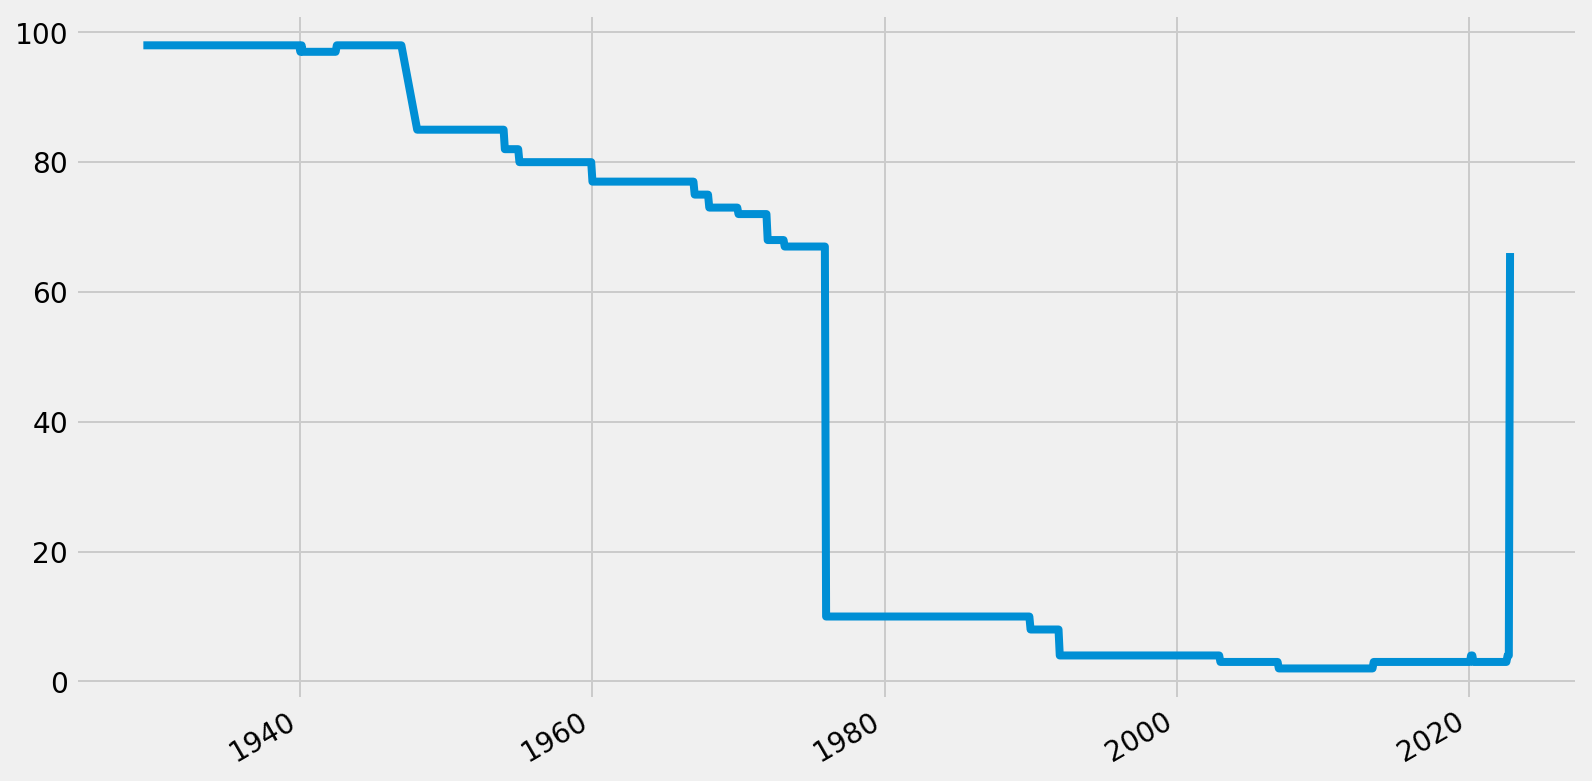

In [76]:
unemp_results.isna().sum(axis = 1).plot()

In [79]:
unemp_results.dropna(axis = 0, how = 'any').shape

(0, 99)

In [80]:
unemp_results.shape

(1112, 99)

In [84]:
unemp_results.columns

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'LNS14000002', 'LNS14000031', 'NYUR', 'LNS14000024', 'TXUR', 'U2RATE',
       'FLUR', 'LNS14000009', 'LNS14000003', 'LNS14027662', 'LNS14000001',
       'OHUR', 'ALUR', 'LRUN64TTUSM156S', 'MIUR', 'LNS14027660', 'PAUR',
       'LNS14032183', 'COUR', 'NJUR', 'MNUR', 'ILUR', 'MAUR', 'AZUR', 'AKUR',
       'GAUR', 'KYUR', 'NCUR', 'WAUR', 'VAUR', 'ORUR', 'TNUR', 'UTUR', 'NMUR',
       'WVUR', 'LASMT261982000000003', 'MOUR', 'SCUR', 'WIUR', 'INUR',
       'LNS14000012', 'IAUR', 'NVUR', 'LNS14027659', 'LAUR', 'MDUR', 'OKUR',
       'NDUR', 'ARUR', 'LASMT391746000000003', 'CTUR', 'HIUR', 'NEUR', 'MTUR',
       'SDUR', 'KSUR', 'MSUR', 'IDUR', 'LNS14000060', 'LNS14024887', 'MEUR',
       'LNS14000018', 'DEUR', 'WYUR', 'RIUR', 'DCUR', 'VTUR', 'NHUR',
       'LNS14000032', 'PRUR', 'LNS14000028', 'LRHUTTTTUSM156S', 'CNERUR',
       'LNS14000036', 'CMWRUR', 'LNS14000029', 'LNS14027689',
       'LRUN24TTUSM156S', '

In [254]:
df = unemp_results.loc[:, ~((unemp_results.columns.str.contains('LNS')) | (unemp_results.columns.str.contains('M089')) | (unemp_results.columns.str.contains('LASMT')) | (unemp_results.columns.str.contains('LRUN')) | (unemp_results.columns.str.contains('UNRATE')) | (unemp_results.columns.str.contains('LRHUTT')) | (unemp_results.columns.str.contains('USAURAMS')) | (unemp_results.columns.str.len() > 4))]

In [125]:
df.head(3)

,CAUR,NYUR,TXUR,FLUR,OHUR,ALUR,MIUR,PAUR,COUR,NJUR,MNUR,ILUR,MAUR,AZUR,AKUR,GAUR,KYUR,NCUR,WAUR,VAUR,ORUR,TNUR,UTUR,NMUR,WVUR,MOUR,SCUR,WIUR,INUR,IAUR,NVUR,LAUR,MDUR,OKUR,NDUR,ARUR,CTUR,HIUR,NEUR,MTUR,SDUR,KSUR,MSUR,IDUR,MEUR,DEUR,WYUR,RIUR,DCUR,VTUR,NHUR,PRUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df.shape

(1112, 52)

In [127]:
df.isna().sum()

CAUR    550
NYUR    550
TXUR    550
FLUR    550
OHUR    550
ALUR    550
MIUR    550
PAUR    550
COUR    550
NJUR    550
MNUR    550
ILUR    550
MAUR    550
AZUR    550
AKUR    550
GAUR    550
KYUR    550
NCUR    550
WAUR    550
VAUR    550
ORUR    550
TNUR    550
UTUR    550
NMUR    550
WVUR    550
MOUR    550
SCUR    550
WIUR    550
INUR    550
IAUR    550
NVUR    550
LAUR    550
MDUR    550
OKUR    550
NDUR    550
ARUR    550
CTUR    550
HIUR    550
NEUR    550
MTUR    550
SDUR    550
KSUR    550
MSUR    550
IDUR    550
MEUR    550
DEUR    550
WYUR    550
RIUR    550
DCUR    550
VTUR    550
NHUR    550
PRUR    554
dtype: int64

In [128]:
df.loc[df.DCUR.isnull(),].index

DatetimeIndex(['1929-04-01', '1929-05-01', '1929-06-01', '1929-07-01',
               '1929-08-01', '1929-09-01', '1929-10-01', '1929-11-01',
               '1929-12-01', '1930-01-01',
               ...
               '1975-04-01', '1975-05-01', '1975-06-01', '1975-07-01',
               '1975-08-01', '1975-09-01', '1975-10-01', '1975-11-01',
               '1975-12-01', '2022-11-01'],
              dtype='datetime64[ns]', length=550, freq=None)

In [129]:
df.drop(index = df.loc[df.DCUR.isnull(),].index)

,CAUR,NYUR,TXUR,FLUR,OHUR,ALUR,MIUR,PAUR,COUR,NJUR,MNUR,ILUR,MAUR,AZUR,AKUR,GAUR,KYUR,NCUR,WAUR,VAUR,ORUR,TNUR,UTUR,NMUR,WVUR,MOUR,SCUR,WIUR,INUR,IAUR,NVUR,LAUR,MDUR,OKUR,NDUR,ARUR,CTUR,HIUR,NEUR,MTUR,SDUR,KSUR,MSUR,IDUR,MEUR,DEUR,WYUR,RIUR,DCUR,VTUR,NHUR,PRUR
1976-01-01,9.2,10.3,5.8,9.7,8.1,6.6,9.9,8.0,5.8,10.3,6.0,6.6,10.5,10.2,7.1,8.4,5.6,6.4,8.5,6.1,9.5,6.0,5.8,8.6,7.5,5.9,7.4,5.8,6.6,4.3,9.2,6.3,6.4,5.8,3.4,7.3,9.8,9.8,3.3,5.8,3.3,4.2,6.7,5.6,8.7,8.0,4.1,7.8,8.7,8.6,6.5,19.6
1976-02-01,9.2,10.3,5.8,9.7,8.1,6.6,9.9,8.1,5.7,10.3,6.0,6.6,10.5,10.2,7.1,8.4,5.6,6.4,8.5,6.1,9.5,6.0,5.9,8.7,7.5,5.9,7.4,5.8,6.6,4.3,9.2,6.3,6.4,5.8,3.4,7.3,9.8,9.8,3.3,5.8,3.3,4.2,6.7,5.6,8.7,8.0,4.1,7.8,8.7,8.6,6.5,19.5
1976-03-01,9.1,10.2,5.9,9.6,8.1,6.6,9.9,8.1,5.7,10.3,5.9,6.6,10.5,10.1,7.0,8.4,5.6,6.4,8.4,6.1,9.4,6.0,5.8,8.7,7.5,5.9,7.3,5.7,6.5,4.3,9.2,6.3,6.4,5.8,3.4,7.3,9.8,9.8,3.3,5.8,3.2,4.2,6.6,5.6,8.6,8.0,4.1,7.7,8.6,8.6,6.5,19.3
1976-04-01,9.1,10.2,5.9,9.5,8.0,6.5,9.8,8.1,5.6,10.3,5.8,6.6,10.3,10.0,6.9,8.3,5.6,6.3,8.5,6.0,9.2,6.0,5.8,8.6,7.5,6.0,7.2,5.6,6.3,4.2,9.0,6.4,6.4,5.8,3.5,7.2,9.6,9.7,3.2,5.8,3.1,4.2,6.4,5.6,8.6,8.1,4.0,7.7,8.5,8.6,6.5,19.0
1976-05-01,9.0,10.1,5.9,9.3,7.8,6.4,9.6,8.1,5.6,10.3,5.7,6.6,10.1,9.8,6.9,8.1,5.5,6.1,8.5,5.9,9.1,5.9,5.7,8.6,7.4,6.0,7.0,5.5,6.0,4.1,8.9,6.5,6.5,5.7,3.6,7.1,9.4,9.4,3.1,5.8,3.1,4.2,6.3,5.6,8.5,8.3,3.9,7.7,8.4,8.5,6.5,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,4.2,4.4,4.1,2.8,3.9,2.6,4.3,4.5,3.4,3.9,1.8,4.5,3.7,3.3,4.6,2.9,3.7,3.4,3.8,2.8,3.5,3.3,2.0,4.9,3.6,2.8,3.2,2.9,2.4,2.6,4.7,3.8,4.0,2.9,2.5,3.2,4.0,4.2,1.9,2.6,2.3,2.4,3.8,2.5,3.0,4.5,3.1,2.7,5.5,2.2,2.0,6.1
2022-07-01,3.9,4.3,4.0,2.7,3.9,2.6,4.2,4.3,3.3,3.7,1.8,4.4,3.5,3.3,4.5,2.8,3.7,3.4,3.7,2.7,3.5,3.3,2.0,4.5,3.7,2.5,3.2,3.0,2.6,2.5,4.4,3.7,3.9,2.9,2.3,3.3,3.7,4.0,2.0,2.7,2.3,2.4,3.6,2.6,2.8,4.4,3.0,2.7,5.2,2.1,2.0,5.9
2022-08-01,4.1,4.7,4.1,2.7,4.0,2.6,4.1,4.2,3.4,4.0,1.9,4.5,3.6,3.5,4.6,2.8,3.8,3.5,3.7,2.6,3.7,3.4,2.0,4.4,3.9,2.5,3.1,3.1,2.8,2.6,4.4,3.5,4.3,3.1,2.3,3.4,4.1,4.0,2.1,2.8,2.3,2.5,3.6,2.7,3.1,4.5,3.1,2.8,5.1,2.1,2.0,5.8
2022-09-01,3.8,4.3,4.0,2.5,4.0,2.6,4.1,4.1,3.4,3.3,2.0,4.5,3.4,3.7,4.4,2.8,3.8,3.6,3.7,2.6,3.8,3.4,2.1,4.2,4.0,2.4,3.2,3.2,2.8,2.7,4.4,3.4,4.0,3.2,2.2,3.5,4.0,3.5,2.2,2.9,2.3,2.6,3.6,2.8,3.3,4.3,3.3,3.1,4.7,2.1,2.2,NaN


In [130]:
df = df.drop(index = df.loc[df.DCUR.isnull(),].index)

In [131]:
df = df.dropna(axis = 0, how = 'all')

In [132]:
df.shape

(562, 52)

In [133]:
px.line(df)

In [134]:
df.loc[df.index == '2020-04-01', :].T

,2020-04-01
CAUR,15.9
NYUR,16.2
TXUR,12.6
FLUR,13.2
OHUR,16.4
ALUR,13.7
MIUR,22.7
PAUR,16.5
COUR,11.6
NJUR,15.5


In [135]:
px.bar(df.loc[df.index == '2020-04-01', :].T)

In [136]:
px.bar(df.loc[df.index == '2020-04-01', :])

In [141]:
df.loc[df.index == '2020-04-01', :].T.sort_values(by = '2020-04-01',ascending = False).head()

,2020-04-01
NVUR,28.5
MIUR,22.7
HIUR,22.4
RIUR,18.4
ILUR,17.4


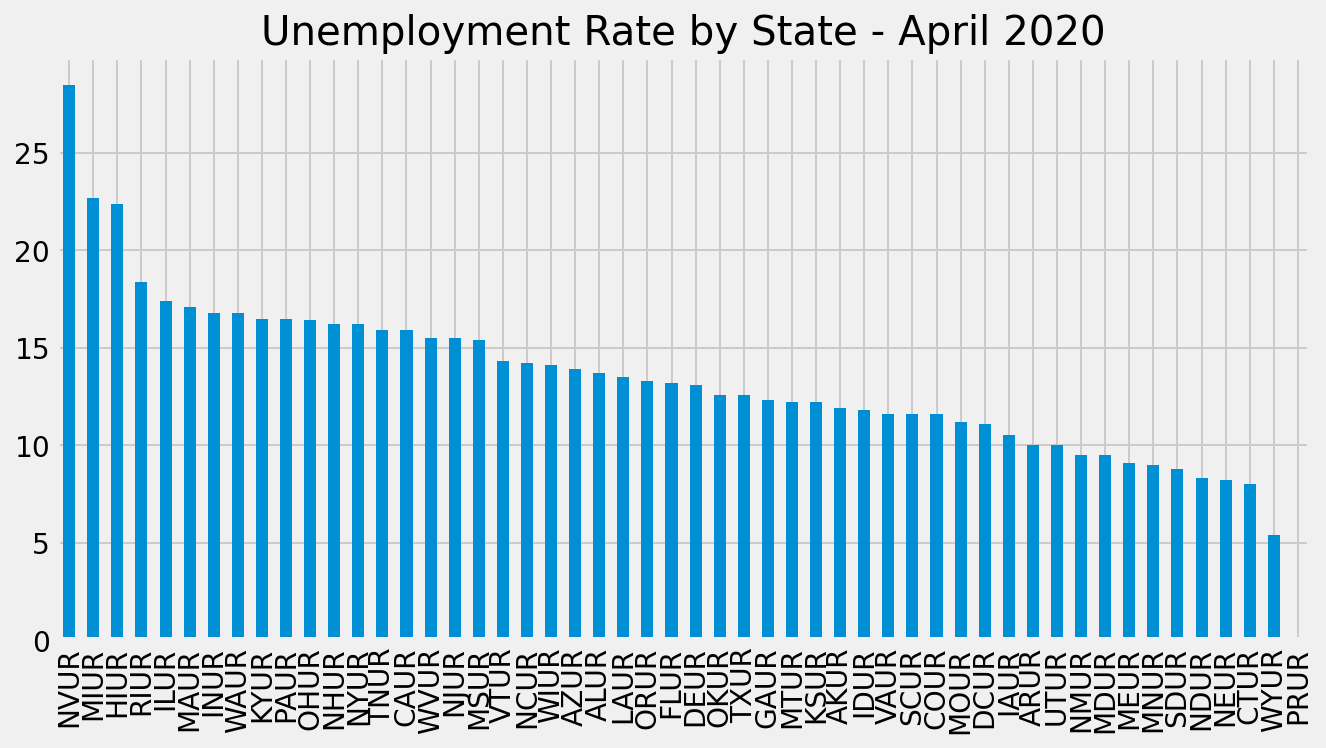

In [148]:
ax = df.loc[df.index == '2020-04-01', :].T\
.sort_values(by = '2020-04-01', ascending = False)\
.plot(kind = 'bar', figsize = (10, 5), title = 'Unemployment Rate by State - April 2020')
ax.legend().remove()
plt.show()

In [149]:
unemp_results.head()

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,LNS14000002,LNS14000031,NYUR,LNS14000024,TXUR,U2RATE,FLUR,LNS14000009,LNS14000003,LNS14027662,LNS14000001,OHUR,ALUR,LRUN64TTUSM156S,MIUR,LNS14027660,PAUR,LNS14032183,COUR,NJUR,MNUR,ILUR,MAUR,AZUR,AKUR,GAUR,KYUR,NCUR,WAUR,VAUR,ORUR,TNUR,UTUR,NMUR,WVUR,LASMT261982000000003,MOUR,SCUR,WIUR,INUR,LNS14000012,IAUR,NVUR,LNS14027659,LAUR,MDUR,OKUR,NDUR,ARUR,LASMT391746000000003,CTUR,HIUR,NEUR,MTUR,SDUR,KSUR,MSUR,IDUR,LNS14000060,LNS14024887,MEUR,LNS14000018,DEUR,WYUR,RIUR,DCUR,VTUR,NHUR,LNS14000032,PRUR,LNS14000028,LRHUTTTTUSM156S,CNERUR,LNS14000036,CMWRUR,LNS14000029,LNS14027689,LRUN24TTUSM156S,LNS14200000,LNS14000315,LNS14023705,LRUNTTTTUSM156S,LNS14000026,CSOUUR,LNS14000089,CNEWUR,LNS14100000,CWSTUR,LNS14024230,LNS14000048,LNS14000025,LNS14000061,LNS14000150,USAURAMS
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-12-12,2022-12-12,Unemployment Rate,1948-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:02-06:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-12-12,2022-12-12,Unemployment Rate - Black or African American,1972-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-02 07:44:09-06:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2022-12-12,2022-12-12,Unemployment Rate in California,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:17:13-06:00,58,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2022-12-12,2022-12-12,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2022-12-12,2022-12-12,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,17,Series Is Presented Here As Three Variables--(...


In [151]:
unemp_df.title.str.replace("Unemployment Rate in ", "").to_dict()

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'CAUR': 'California',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'M0892BUSM156SNBR': 'Unemployment Rate for United States',
 'LNS14000002': 'Unemployment Rate - Women',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'NYUR': 'New York',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'TXUR': 'Texas',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'FLUR': 'Florida',
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'LNS14000003': 'Unemployment Rate - White',
 'LNS14027662': "Unemployment Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LNS14000001': 'Unemployment Rate - Men',
 'OHUR': 'Ohio',
 'ALUR': 'Alabama',
 'LRUN64TTUSM156S': 'Unemployment Rate: Aged 15-64: All Persons for the United States',
 'MIUR': 'Michigan',
 'LNS14027660': 'Unemployment Rate - High School Graduates, No College, 25 Yrs. & over',
 

In [152]:
dict_names = unemp_df.title.str.replace("Unemployment Rate in ", "").to_dict()

In [153]:
df.head()

,CAUR,NYUR,TXUR,FLUR,OHUR,ALUR,MIUR,PAUR,COUR,NJUR,MNUR,ILUR,MAUR,AZUR,AKUR,GAUR,KYUR,NCUR,WAUR,VAUR,ORUR,TNUR,UTUR,NMUR,WVUR,MOUR,SCUR,WIUR,INUR,IAUR,NVUR,LAUR,MDUR,OKUR,NDUR,ARUR,CTUR,HIUR,NEUR,MTUR,SDUR,KSUR,MSUR,IDUR,MEUR,DEUR,WYUR,RIUR,DCUR,VTUR,NHUR,PRUR
1976-01-01,9.2,10.3,5.8,9.7,8.1,6.6,9.9,8.0,5.8,10.3,6.0,6.6,10.5,10.2,7.1,8.4,5.6,6.4,8.5,6.1,9.5,6.0,5.8,8.6,7.5,5.9,7.4,5.8,6.6,4.3,9.2,6.3,6.4,5.8,3.4,7.3,9.8,9.8,3.3,5.8,3.3,4.2,6.7,5.6,8.7,8.0,4.1,7.8,8.7,8.6,6.5,19.6
1976-02-01,9.2,10.3,5.8,9.7,8.1,6.6,9.9,8.1,5.7,10.3,6.0,6.6,10.5,10.2,7.1,8.4,5.6,6.4,8.5,6.1,9.5,6.0,5.9,8.7,7.5,5.9,7.4,5.8,6.6,4.3,9.2,6.3,6.4,5.8,3.4,7.3,9.8,9.8,3.3,5.8,3.3,4.2,6.7,5.6,8.7,8.0,4.1,7.8,8.7,8.6,6.5,19.5
1976-03-01,9.1,10.2,5.9,9.6,8.1,6.6,9.9,8.1,5.7,10.3,5.9,6.6,10.5,10.1,7.0,8.4,5.6,6.4,8.4,6.1,9.4,6.0,5.8,8.7,7.5,5.9,7.3,5.7,6.5,4.3,9.2,6.3,6.4,5.8,3.4,7.3,9.8,9.8,3.3,5.8,3.2,4.2,6.6,5.6,8.6,8.0,4.1,7.7,8.6,8.6,6.5,19.3
1976-04-01,9.1,10.2,5.9,9.5,8.0,6.5,9.8,8.1,5.6,10.3,5.8,6.6,10.3,10.0,6.9,8.3,5.6,6.3,8.5,6.0,9.2,6.0,5.8,8.6,7.5,6.0,7.2,5.6,6.3,4.2,9.0,6.4,6.4,5.8,3.5,7.2,9.6,9.7,3.2,5.8,3.1,4.2,6.4,5.6,8.6,8.1,4.0,7.7,8.5,8.6,6.5,19.0
1976-05-01,9.0,10.1,5.9,9.3,7.8,6.4,9.6,8.1,5.6,10.3,5.7,6.6,10.1,9.8,6.9,8.1,5.5,6.1,8.5,5.9,9.1,5.9,5.7,8.6,7.4,6.0,7.0,5.5,6.0,4.1,8.9,6.5,6.5,5.7,3.6,7.1,9.4,9.4,3.1,5.8,3.1,4.2,6.3,5.6,8.5,8.3,3.9,7.7,8.4,8.5,6.5,18.9


In [226]:
df_T = df.T

In [227]:
df_T.reset_index(inplace = True)

In [228]:
df_T['state'] = df_T.loc[:, 'index'].map(dict_names)

In [229]:
df_T.head()

,state,index,1976-01-01 00:00:00,1976-02-01 00:00:00,1976-03-01 00:00:00,1976-04-01 00:00:00,1976-05-01 00:00:00,1976-06-01 00:00:00,1976-07-01 00:00:00,1976-08-01 00:00:00,1976-09-01 00:00:00,1976-10-01 00:00:00,1976-11-01 00:00:00,1976-12-01 00:00:00,1977-01-01 00:00:00,1977-02-01 00:00:00,1977-03-01 00:00:00,1977-04-01 00:00:00,1977-05-01 00:00:00,1977-06-01 00:00:00,1977-07-01 00:00:00,1977-08-01 00:00:00,1977-09-01 00:00:00,1977-10-01 00:00:00,1977-11-01 00:00:00,1977-12-01 00:00:00,1978-01-01 00:00:00,1978-02-01 00:00:00,1978-03-01 00:00:00,1978-04-01 00:00:00,1978-05-01 00:00:00,1978-06-01 00:00:00,1978-07-01 00:00:00,1978-08-01 00:00:00,1978-09-01 00:00:00,1978-10-01 00:00:00,1978-11-01 00:00:00,1978-12-01 00:00:00,1979-01-01 00:00:00,1979-02-01 00:00:00,1979-03-01 00:00:00,1979-04-01 00:00:00,1979-05-01 00:00:00,1979-06-01 00:00:00,1979-07-01 00:00:00,1979-08-01 00:00:00,1979-09-01 00:00:00,1979-10-01 00:00:00,1979-11-01 00:00:00,1979-12-01 00:00:00,1980-01-01 00:00:00,1980-02-01 00:00:00,1980-03-01 00:00:00,1980-04-01 00:00:00,1980-05-01 00:00:00,1980-06-01 00:00:00,1980-07-01 00:00:00,1980-08-01 00:00:00,1980-09-01 00:00:00,1980-10-01 00:00:00,1980-11-01 00:00:00,1980-12-01 00:00:00,1981-01-01 00:00:00,1981-02-01 00:00:00,1981-03-01 00:00:00,1981-04-01 00:00:00,1981-05-01 00:00:00,1981-06-01 00:00:00,1981-07-01 00:00:00,1981-08-01 00:00:00,1981-09-01 00:00:00,1981-10-01 00:00:00,1981-11-01 00:00:00,1981-12-01 00:00:00,1982-01-01 00:00:00,1982-02-01 00:00:00,1982-03-01 00:00:00,1982-04-01 00:00:00,1982-05-01 00:00:00,1982-06-01 00:00:00,1982-07-01 00:00:00,1982-08-01 00:00:00,1982-09-01 00:00:00,1982-10-01 00:00:00,1982-11-01 00:00:00,1982-12-01 00:00:00,1983-01-01 00:00:00,1983-02-01 00:00:00,1983-03-01 00:00:00,1983-04-01 00:00:00,1983-05-01 00:00:00,1983-06-01 00:00:00,1983-07-01 00:00:00,1983-08-01 00:00:00,1983-09-01 00:00:00,1983-10-01 00:00:00,1983-11-01 00:00:00,1983-12-01 00:00:00,1984-01-01 00:00:00,1984-02-01 00:00:00,1984-03-01 00:00:00,1984-04-01 00:00:00,1984-05-01 00:00:00,1984-06-01 00:00:00,1984-07-01 00:00:00,1984-08-01 00:00:00,1984-09-01 00:00:00,1984-10-01 00:00:00,1984-11-01 00:00:00,1984-12-01 00:00:00,1985-01-01 00:00:00,1985-02-01 00:00:00,1985-03-01 00:00:00,1985-04-01 00:00:00,1985-05-01 00:00:00,1985-06-01 00:00:00,1985-07-01 00:00:00,1985-08-01 00:00:00,1985-09-01 00:00:00,1985-10-01 00:00:00,1985-11-01 00:00:00,1985-12-01 00:00:00,1986-01-01 00:00:00,1986-02-01 00:00:00,1986-03-01 00:00:00,1986-04-01 00:00:00,1986-05-01 00:00:00,1986-06-01 00:00:00,1986-07-01 00:00:00,1986-08-01 00:00:00,1986-09-01 00:00:00,1986-10-01 00:00:00,1986-11-01 00:00:00,1986-12-01 00:00:00,1987-01-01 00:00:00,1987-02-01 00:00:00,1987-03-01 00:00:00,1987-04-01 00:00:00,1987-05-01 00:00:00,1987-06-01 00:00:00,1987-07-01 00:00:00,1987-08-01 00:00:00,1987-09-01 00:00:00,1987-10-01 00:00:00,1987-11-01 00:00:00,1987-12-01 00:00:00,1988-01-01 00:00:00,1988-02-01 00:00:00,1988-03-01 00:00:00,1988-04-01 00:00:00,1988-05-01 00:00:00,1988-06-01 00:00:00,1988-07-01 00:00:00,1988-08-01 00:00:00,1988-09-01 00:00:00,1988-10-01 00:00:00,1988-11-01 00:00:00,1988-12-01 00:00:00,1989-01-01 00:00:00,1989-02-01 00:00:00,1989-03-01 00:00:00,1989-04-01 00:00:00,1989-05-01 00:00:00,1989-06-01 00:00:00,1989-07-01 00:00:00,1989-08-01 00:00:00,1989-09-01 00:00:00,1989-10-01 00:00:00,1989-11-01 00:00:00,1989-12-01 00:00:00,1990-01-01 00:00:00,1990-02-01 00:00:00,1990-03-01 00:00:00,1990-04-01 00:00:00,1990-05-01 00:00:00,1990-06-01 00:00:00,1990-07-01 00:00:00,1990-08-01 00:00:00,1990-09-01 00:00:00,1990-10-01 00:00:00,1990-11-01 00:00:00,1990-12-01 00:00:00,1991-01-01 00:00:00,1991-02-01 00:00:00,1991-03-01 00:00:00,1991-04-01 00:00:00,1991-05-01 00:00:00,1991-06-01 00:00:00,1991-07-01 00:00:00,1991-08-01 00:00:00,1991-09-01 00:00:00,1991-10-01 00:00:00,1991-11-01 00:00:00,1991-12-01 00:00:00,1992-01-01 00:00:00,1992-02-01 00:00:00,1992-03-01 00:00:00,1992-04-01 00:00:00,1992-05-01 00:00:00,1992-06-01 00:00:00,1992-07-01 00:00:00,1992-08

In [234]:
df = df_T.rename(columns = dict(index = 'state_code')).set_index('state').T

In [236]:
df = df.loc[(df.index != 'state_code'), :]